In [1]:
from __future__ import print_function
from os import listdir
import pandas as pd
import numpy as np
import pickle

In [10]:
class unitStructure():
    def __init__(self):
        self.Spikes = []
        self.IS = 0.0
        self.XYZ = []
        self.Loc = ''
        self.Stab = []
        
#     def approx_firing_rate(self, sigma=100):
#         approxFiringRateArray = np.empty((0, len(self.Spikes[0])), int)
#         for trial, spikeTrain in enumerate(self.Spikes):
#             approxFiringRate = np.zeros(len(spikeTrain))
#             timeSeries = np.arange(len(spikeTrain))
#             for timePoint in timeSeries:
#                 kernel = np.exp(-(timeSeries - timePoint) ** 2 / (2 * sigma ** 2))
#                 kernel = kernel / sum(kernel)
#                 approxFiringRate[timePoint] = sum(spikeTrain * kernel)
#             approxFiringRateArray = np.insert(approxFiringRateArray, trial, approxFiringRate, axis=0)
#         return approxFiringRateArray

In [15]:
def ex_int(s):
    try:
        int(s)
    except ValueError:
        return np.nan
    else:
        return int(s)

In [16]:
dataDir = '../data/'
dirNames = ['m4404ee', 'c6404ee']
fileTypes = ['Tbhv', 'trTarget', 'ANdat', 'analogAx']


for dirName in dirNames:
    targetDir = dataDir + dirName
    files = listdir(targetDir)
    for fileName in files:
        if fileName.startswith('unit') & fileName.endswith('.txt'):
            fh = open(targetDir + '/' + fileName)
            unit = unitStructure()
            for line in fh.readlines():
                line = line.replace('\n', '')
                if line.startswith('Spikes:'):
                    continue
                elif line.startswith('IS:'):
                    elems = line.split(': ')
                    unit.IS = float(elems[1])
                elif line.startswith('XYZ:'):
                    elems = line.split(': ')
                    unit.XYZ = [float(s) for s in elems[1].split(', ')]
                elif line.startswith('Loc:'):
                    elems = line.split(': ')
                    unit.Loc = elems[1]
                elif line.startswith('Stab:'):
                    elems = line.split(': ')
                    unit.Stab = [int(s) for s in elems[1].split(', ')]
                else:
                    spikes = [ex_int(s) for s in line.split(', ')]
                    spikes = np.array(spikes)
                    unit.Spikes.append(spikes)
            pickleFileName = targetDir + '/' + fileName.replace('.txt', '.binaryfile')
            outFile = open(pickleFileName, 'wb')
            pickle.dump(unit, outFile)

In [8]:
dataDir = '../data/'
dirNames = ['m4404ee', 'c6404ee']
fileTypes = ['Tbhv', 'trTarget', 'ANdat', 'analogAx']

targetDir = dataDir + dirNames[0]
files = listdir(targetDir)
for fileName in files:
    if fileName.startswith('ANdat'):
        ANdat_DF = pd.read_csv(targetDir + '/' + fileName, header=None)

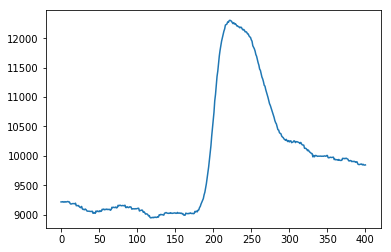

7723